# Data preperation

Deze notebook kan gebruikt worden om de reeds automatisch gelabelde data te controleren (data die reeds gelabeld is door ons eigen wall_algorithm of andere reeds gelabelde data).  

Onderstaande code doet dit door de overlay en de image waar de overlay bij hoort over elkaar heen te leggen. Door y of n te klikken word de overlay en het plaatje in de juiste map ingedeeld waarna de fout gelabelde data met de hand kan worden gelabeld.

Deze code kan niet op zichzelf worden gerunt gezien het gebruik maakt van de main van onze code.
https://github.com/jobvink/wall_detection


# Voorbeeld

het onderstaande geplotte plaatje geeft weer wat dit tooltje doet. het opent een tkinter window en plot de frame en mask over elkaar heen. door op "n"(o) of "y"(es) te klikken wordt de mask en frame in de juiste map opgeslagen. vervolgens opent automatisch het opvolgende frame en mask. Hierbij wordt rekening gehouden met het originele framenummer welke is opgeslagen in een .json bestand

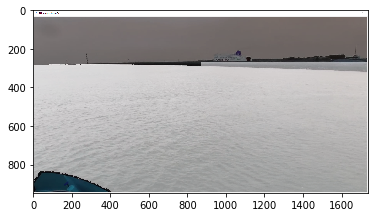

In [8]:
import matplotlib.pyplot as plt

plt.imshow(plt.imread('./frame_checker.PNG'))
plt.axis('off')
plt.show()

# onderstaand is de originele code. Als je dit wilt testen dien je de eerder gelinkte repository geheel te downloaden


## HOW TO:

Pas de paths aan en maak waar nodig de juiste directories om de data in te kopieren.

gebruik:
y - als het frame goed is
n - als het frame fout is

In [ ]:
import tkinter
import json
import PIL.Image
import PIL.ImageTk
import cv2

class App:
    window: tkinter.Tk

    def __init__(self, window, window_title):
        self.window = window
        self.window.title(window_title)
        self.window.bind("<Key>", self.key_press)
        self.points = []
        self.frame_number = 0
        self.frames_json = json.load(open('labeled_data/raw_frames_info.json', 'r'))
        self.overlays_json = json.load(open('labeled_data/raw_overlays_info.json', 'r'))

        # Load an images using OpenCV and convert it to RGBA
        print(self.frames_json[self.frame_number]['file_path'])
        self.frame_RGBA_converted = cv2.cvtColor(cv2.imread('./' + self.frames_json[self.frame_number]['file_path']), cv2.COLOR_RGB2RGBA)
        self.overlay_RGBA_converted = cv2.cvtColor(cv2.imread(self.overlays_json[self.frame_number]['file_path']), cv2.COLOR_RGB2RGBA)

        # Get the image dimensions (OpenCV stores image data as NumPy ndarray)
        self.height, self.width, no_channels = self.frame_RGBA_converted.shape

        # Create a canvas that can fit the above image
        self.canvas = tkinter.Canvas(self.window, width=self.width, height=self.height)
        self.canvas.pack()
        self.load_image(self.frames_json[self.frame_number]['file_path'], self.overlays_json[self.frame_number]['file_path'])
        self.frame_number += 1

        self.window.mainloop()

    def key_press(self, event):
        if event.char == 'y':
            cv2.imwrite('./labeled_data/frames/frames_goed/frame_{}.png'.format(self.frame_number), self.frame_RGBA_converted)
            cv2.imwrite('./labeled_data/overlays/overlays_goed/overlay_{}.png'.format(self.frame_number), self.overlay_RGBA_converted)

            self.canvas.delete('all')
            self.load_image(self.frames_json[self.frame_number]['file_path'], self.overlays_json[self.frame_number]['file_path'])
            self.frame_number += 1

        if event.char == 'n':
            cv2.imwrite('./labeled_data/frames/frames_fout/frame_{}.png'.format(self.frame_number), self.frame_RGBA_converted)
            cv2.imwrite('./labeled_data/overlays/overlays_fout/overlay_{}.png'.format(self.frame_number), self.overlay_RGBA_converted)

            self.canvas.delete('all')
            self.load_image(self.frames_json[self.frame_number]['file_path'], self.overlays_json[self.frame_number]['file_path'])
            self.frame_number += 1

    def load_image(self, frame_path, overlay_path):
        self.frame_RGBA_converted = cv2.cvtColor(cv2.imread(frame_path), cv2.COLOR_RGB2RGBA)
        self.overlay_RGBA_converted = cv2.cvtColor(cv2.imread(overlay_path), cv2.COLOR_RGB2RGBA)

        # Use OpenCV to combine images
        self.merged_image = cv2.addWeighted(self.frame_RGBA_converted, 0.5, self.overlay_RGBA_converted, 0.5, 0)

        # Use PIL (Pillow) to convert the NumPy ndarray to a PhotoImage
        self.photo = PIL.ImageTk.PhotoImage(image=PIL.Image.fromarray(self.merged_image))

        # Add a PhotoImage to the Canvas
        self.canvas.create_image(0, 0, image=self.photo, anchor=tkinter.NW)


# Create a window and pass it to the Application object
App(tkinter.Tk(), "Tkinter and OpenCV")
